<img src="https://www.python.org/static/img/python-logo.png">

# Welcome to my lessons

---

**Bo Zhang** (NAOC, <mailto:bozhang@nao.cas.cn>) will have a few lessons on python.

- These are **very useful knowledge, skills and code styles** when you use `python` to process astronomical data.
- All materials can be found on [**my github page**](https://github.com/hypergravity/cham_teaches_python).
- **jupyter notebook** (formerly named **ipython notebook**) is recommeded to use

---
These lectures are organized as below:
1. install python
2. basic syntax
3. numerical computing
4. scientific computing
5. plotting
6. astronomical data processing
7. high performance computing
8. version control


# matplotlib
**website**: [http://matplotlib.org/](http://matplotlib.org/)

**some examples**:  http://leejjoon.github.io/matplotlib_astronomy_gallery/

**This is all about aesthetics :-)**:http://blog.olgabotvinnik.com/prettyplotlib/


In [1]:
# import matplotlib.pyplot as plt
# import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# curve / scatter plot

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


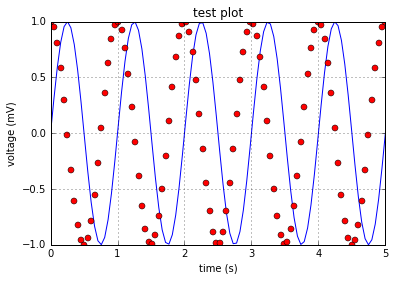

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0.,5.,100)
y_c = np.sin(2*np.pi*x)
y_s = np.cos(2*np.pi*x)
ax.plot(x,y_c)
ax.plot(x,y_s, 'ro')
# fig.show()

ax.set_xlabel('time (s)')
ax.set_ylabel('voltage (mV)')
ax.set_title('test plot')
ax.grid(True)
# fig.savefig("test.pdf")
fig.show()

**For scientific or mathematical notations:** use *\mathrm{}* with latex style input

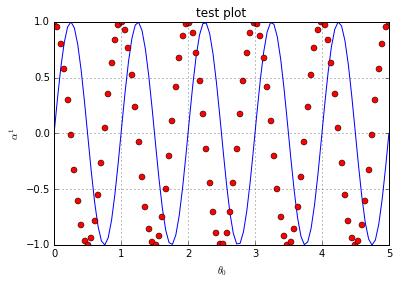

In [3]:
ax.set_xlabel(r'$\mathrm{\theta_{0}}$')
ax.set_ylabel(r'$\mathrm{\alpha^{1}}$')
fig

# sub-plots / sub-axes

  use ImageGrid or subplot in matplotlib

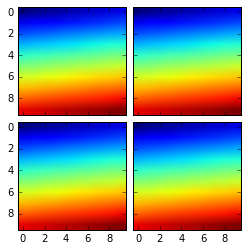

In [4]:
from mpl_toolkits.axes_grid1 import ImageGrid

im = np.arange(100)
im.shape = 10, 10

fig = plt.figure(1, (4., 4.))
grid = ImageGrid(fig, 111,
                 nrows_ncols = (2, 2), # creates 2x2 grid of axes
                 axes_pad=0.1)

for i in range(4):
    grid[i].imshow(im)

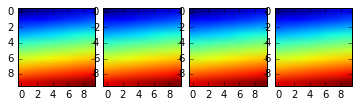

In [5]:
fig = figure(1)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1)
    ax.imshow(im)
plt.subplots_adjust(hspace=0.1,wspace=0.1)

# Insert a zoom-up part of an image

  zoomed_inset_axes or patches from matplotlib


(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7fb4b4762ed0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fb4b4781810>)

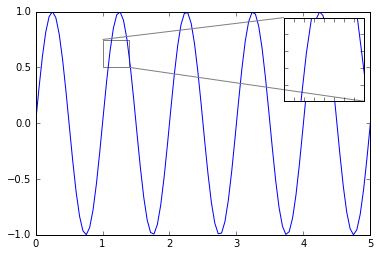

In [6]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

fig, ax = plt.subplots() # create a new figure with a default 111 subplot
ax.plot(x, y_c)

axins = zoomed_inset_axes(ax, 3, loc=1) # zoom-factor: 2.5
axins.plot(x, y_c)

x1, x2, y1, y2 = 1, 1.4, 0.5, 0.75 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits


plt.yticks(visible=False)
plt.xticks(visible=False)

#fancy zoom-effect
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# contour plots & binned statistics
matplotlib gallery: [http://matplotlib.org/examples/pylab_examples/contour_demo.html](http://matplotlib.org/examples/pylab_examples/contour_demo.html)

In [73]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(-1.0, 6.0)

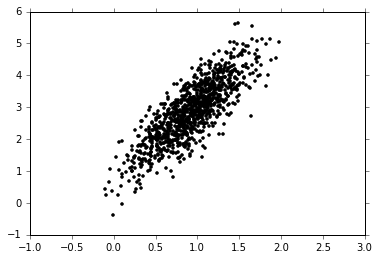

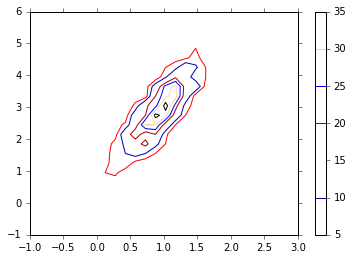

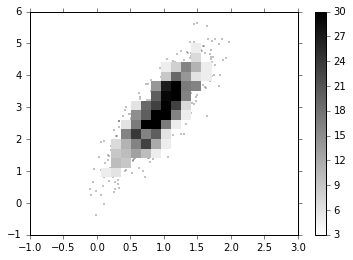

In [113]:
from scipy.stats import binned_statistic_2d
x_ = np.random.randn(1000,)*0.2+0.
y_ = np.random.randn(1000,)*1.0+3.

theta = np.pi*0.1
x = x_*np.cos(theta) + y_*np.sin(theta)
y = -x_*np.sin(theta) + y_*np.cos(theta)

statistic, x_edges, y_edges, binnumber = \
    binned_statistic_2d(x, y, x, statistic='count', bins=[np.arange(-1.0, 3.0, 0.15), np.arange(-1.0, 6.0, 0.3)])
statistic = statistic.T
x_centers = diff(x_edges)/2.+x_edges[:-1]
y_centers = diff(y_edges)/2.+y_edges[:-1]


fig = plt.figure()

plt.plot(x, y, 'k.')
plt.xlim(-1., 3.)
plt.ylim(-1., 6.)

fig = plt.figure()
plt.contour(x_centers, y_centers, statistic)
plt.xlim(-1., 3.)
plt.ylim(-1., 6.)
plt.colorbar()

fig = plt.figure()
statistic[statistic<5.] = np.nan
plt.plot(x, y, '.', c='k', ms=1, zorder=2)

# Define custom colormaps: Set pixels with no sources to white
cmap = plt.cm.gray_r
cmap.set_bad('w', 0.)
plt.imshow(statistic,
           extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]), 
           interpolation='nearest',
           origin='lower',
           cmap=cmap,
           aspect='auto',
           alpha=1.0,
           vmin=3, vmax=30,zorder=3)

# plt.contour(x_centers, y_centers, statistic)
plt.colorbar()
plt.xlim(-1., 3.)
plt.ylim(-1., 6.)

# fig.tight_layout()

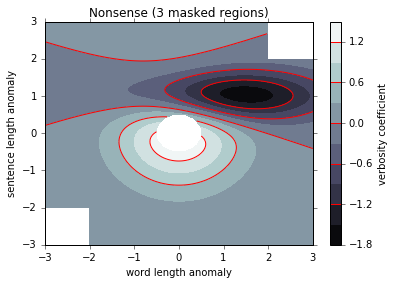

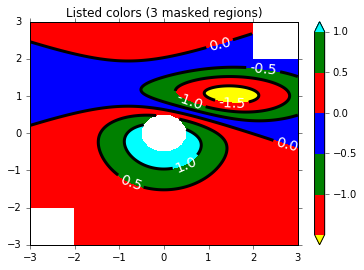

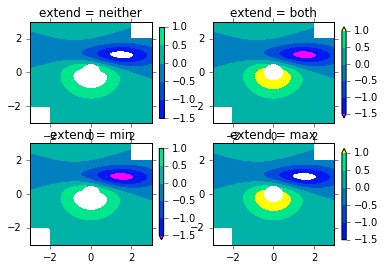

In [75]:
%run ./contourf_demo.py

# 3D plotting

mlab http://docs.enthought.com/mayavi/mayavi/mlab.html

# HOMEWORK
1. try to draw a 1-D, 2-D, 3-D scatter plot, respectively